In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading data
data=pd.read_excel('Telco-Customer-Churn.xlsx')
data.head()

C:\Users\This pc\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1 Compare churn count with respect to gender.

In [5]:
#filtering dataset based on churn
churn_y=data.loc[data['Churn']=='Yes',['gender']]
churn_n=data.loc[data['Churn']=='No',['gender']]

In [6]:
#creating three lists 
X=['Yes','No']
m=[len(churn_y.loc[churn_y['gender']=='Male']),len(churn_n.loc[churn_n['gender']=='Male'])]
f=[len(churn_y.loc[churn_y['gender']=='Female']),len(churn_n.loc[churn_n['gender']=='Female'])]

In [7]:
#creating dataframe using above three lists
df=pd.DataFrame({'catg':X,'Male':m,'Female':f})

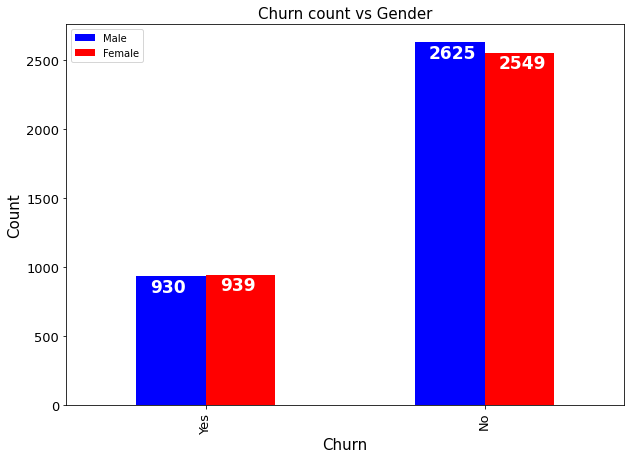

In [8]:
#ploting graph using above dataframe
ax=df.plot(x='catg',y=['Male','Female'],kind='bar',figsize=(10,7),color=['blue','red'],fontsize=13)
ax.set_title('Churn count vs Gender',fontsize=15)
ax.set_xlabel('Churn',fontsize=15)
ax.set_ylabel('Count',fontsize=15)

#adding the count of each type in the graph
for i in ax.patches:
    ax.text(i.get_x()+.05,i.get_height()-111,str(i.get_height()),fontsize=17,color='white',fontweight='bold')

# 2 Find out how many female senior citizens there in the dataset.

In [11]:
#data in column 'SeniorCitizen'
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
#filter 1-finding senior citizens
data_s=data['SeniorCitizen']==1

In [10]:
#filter 2-finding female citizens
data_f=data['gender']=='Female'

In [11]:
#combining two filters and counting the data
len(data.loc[data_s & data_f])

568

There are 568 female senior citizens in the dataset

# 4 Find out which contract preffered by the senior citizen.

In [32]:
#create new data-frame with each type of contract and its count
data_c=pd.DataFrame(data['Contract'].value_counts())

In [33]:
#correcting index of new df
data_c=data_c.reset_index()
data_c

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [34]:
#renaming the column name
data_c.columns=['Contract','Count']
data_c

,Contract,Count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [35]:
#finding total senior citizens to get the percentage
total=data_c['Count'].sum()
total

7043

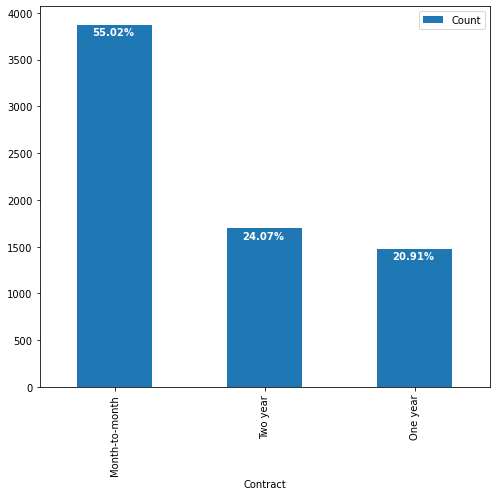

In [37]:
#ploting a bar graph on types of contracts preffered by senior citizens
ax=data_c.plot(x='Contract',y='Count',kind='bar',figsize=(7,7))

#adding percentage of each type on the graph plotted
for i in ax.patches:
    ax.text(i.get_x()+.1,i.get_height()-111,str(round(((i.get_height())/total)*100,2))+'%',fontsize=10,color='white',fontweight='bold')
    
plt.tight_layout()

Month to month contract is preffered by more than half (55.02%) of senior citizens